In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = pd.read_csv('well_cleaned.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.fillna(0)
df=data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5943 entries, 0 to 5942
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL_BORE_CODE            5943 non-null   object 
 1   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 3   AVG_CHOKE_SIZE_P          5943 non-null   float64
 4   AVG_WHP_P                 5943 non-null   float64
 5   AVG_WHT_P                 5943 non-null   float64
 6   DP_CHOKE_SIZE             5943 non-null   float64
 7   BORE_OIL_VOL              5943 non-null   float64
 8   BORE_GAS_VOL              5943 non-null   float64
 9   BORE_WAT_VOL              5943 non-null   float64
 10  FLOW_KIND                 5943 non-null   object 
 11  WELL_TYPE                 5943 non-null   object 
dtypes: float64(9), object(3)
memory usage: 557.3+ KB


(5943, 6)
0.158147190194981
0.8392051195521695


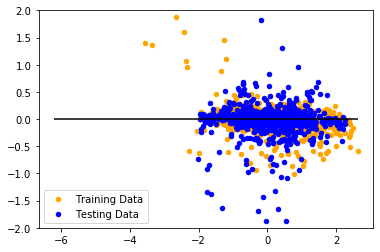

[(0.3361918999832346, 'AVG_WHP_P'),
 (0.2505271451656858, 'AVG_WHT_P'),
 (0.15730923348502662, 'BORE_WAT_VOL'),
 (0.09915268037834198, 'AVG_CHOKE_SIZE_P'),
 (0.09211899136093761, 'BORE_GAS_VOL'),
 (0.0647000496267734, 'BORE_OIL_VOL')]

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Use Pandas get_dummies to convert categorical data
X = df[["AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL"]]
print(X.shape)
y= df["AVG_DOWNHOLE_PRESSURE"].values.reshape(-1, 1)
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.preprocessing import StandardScaler
# # Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# # Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
rf = RandomForestRegressor(n_estimators=100,max_depth=100)
rf = rf.fit(X_train_scaled, y_train_scaled.ravel())
predictions_train = rf.predict(X_train_scaled)
predictions_test = rf.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled.ravel(), predictions_test)
r2 = rf.score(X_test_scaled, y_test_scaled.ravel())
print (MSE)
print (r2)
# Plot Residuals
plt.scatter(predictions_train, predictions_train - y_train_scaled.ravel(), c= "orange",label="Training Data", s=20)
plt.scatter(predictions_test, predictions_test - y_test_scaled.ravel(), c= "blue",label="Testing Data",s=20)
plt.ylim(-2,2)
plt.hlines(y=0, xmin=predictions_train.min(), xmax=predictions_train.max())
plt.legend()
plt.show()
importances= rf.feature_importances_
sorted(zip(importances,X.columns),reverse=True)

